# 4.5 Boosting

영어 사전에서 'boost'의 뜻을 찾아보자.

## 1. 아이디어

여러 개의 약한 학습기들로 `순차적으로` 학습-예측하면서 `잘못 예측한 데이터에 가중치를 부여하여` 오류를 개선해 나가는 앙상블 학습법.

약한 학습기 사례 : depth가 얕은 결정 tree.

* [그림](https://velog.io/@sset2323/04-05.-GBMGradient-Boosting-Machine)을 보자 (교재 223쪽 그림).

+와 - 두 가지 범주로 된 피처 데이터를 약한 학습기로 순차적으로 분류하는 과정을 반복한다. step1부터 step5까지 각 단계에서 잘못 분류된 데이터에 가중치를 부여(step 2, 4)하는 것을 잘 보라. 가중치가 높은 데이터는 다른 데이터보다 더 비중이 큰 데이터로 취급된다. 가령 데이터 A의 가중치가 B의 두 배라면 A 데이터를 두 개로 복제해서 훈련 데이터에 포함시키는 셈이다.

처음 분류에서 오류가 생긴 데이터는 간단히 분류하기 어려운 데이터라고 할 수 있다. 부스팅은 쉬운 데이터보다는 어려운 데이터에 더 집중해서 반복 분류하고 그 결과를 결합하는 방법이다. 

이전 단계의 분류 결과를 바탕으로 데이터에 가중치를 부여하고 다시 분류하는 방법이므로 '순차적(sequential)'방법이라고 한다.

## 2. AdaBoosting

부스팅의 종류 : Adaptive Boost (AdaBoost), Gradient Boost (GBM),......

유방암 데이터를 가지고 부스팅의 기본 방법인 AdaBoost를 연습해보자. 이 방법은 `DecisionTreeClassifier(max_depth = 1)` 모델을 이용한다.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
np.random.seed(5)

cancer = load_breast_cancer()
type(cancer)

sklearn.utils.Bunch

먼저 `DecisionTreeClassifier(max_depth = 1)` 모델로 분류한 경우를 복습하자.

In [2]:
X_train , X_test , y_train , y_test = \
train_test_split(cancer.data, cancer.target,test_size = 0.2,  random_state = 0)

dt_clf = DecisionTreeClassifier(max_depth=1) 
dt_clf.fit(X_train , y_train)

pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, pred)
acc

0.9035087719298246

이어서 sklean.ensemble 안에 있는 AdaBoostClassifier를 불러와서 분류해보자. 

분류 성능은 이용하는 트리모형의 수 `n_estimator`와 `learning_rate`에 따라 달라진다.  learning_rate 값은 0과 1 사이의 값을 가질 수 있는데(기본값(디폴트)은 1) 과대적합 우려가 있을 경우 `learning_rate 값을 낮추면 모형의 복잡도를 낮출 수 있다.`

일단 나무 수(n_estimators)는 10개로 두고 `learning_rate` 값은 기본값을 이용하자.

In [3]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 10, random_state=0)
ada.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(ada.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도: 0.976
테스트 세트 정확도: 0.965


나무 수(`n_estimators`) 값을 바꾸어서 비교해보자.

In [4]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 100, random_state=0)
ada.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(ada.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.956


`n_estimators`가 100일 때 단독 결정 트리 모델이나 `n_estimators`가 10일 때에 비해 훈련세트 정확도는 높아졌지만 테스트 세트 정확도는 낮아졌다. 과대적합된 것으로 볼 수 있으므로 `learning_rate` 값을 낮추어보자.

In [5]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1, random_state=0)
ada.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(ada.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도: 0.989
테스트 세트 정확도: 0.974


그렇다고 해서  `learning_rate` 값을 너무 낮추면 분류 성능이 떨어져버릴 수도 있다.

In [6]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.01, random_state=0)
ada.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(ada.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도: 0.947
테스트 세트 정확도: 0.965


위의 경우 훈련세트 정확도가 테스트세트 정확도보다 더 낮으므로 과소적합된 경우라고 볼 수 있다.  `learning_rate` 값을 너무 줄여서 모형을 지나치게 단순하게 만들었다는 의미다.

## 3. GBM (Gradient Boosting Machine)

두번째로 GBM 또는 Gradient Boosted Decision Trees (GBDT)이라고 불리는 부스팅을 살펴보자. 사이킷런에서 GradientBoostingClassifier를 불러 이용할 수 있는 이 방법은 `max_depth = 3`인 트리 100개를 양상블한 것으로 `learning_rate`의 기본값은 0.1이다. 모델 이름에 'gradient'라는 단어가 붙은 이유는 가중치를 업데이트할 때 `'경사하강법(gradient descent)'`이라는 방법을 이용하기 때문이다(교재 224쪽에 간단한 설명이 나와있다).  

GBM은 매우 인기 높은 앙상블 분류 방법이지만 `학습 시간이 오래 걸리고` AdaBoost에 비해 `많은 hyper parameter들을 선택`해야하는 **단점**도 있다. 이 방법의 중요한 hyper parameter들에 대해서는 교재 225-6쪽의 설명을 보자.

앞에서와 마찬가지로 breast cancer data로 연습해보자.

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore') 
import numpy as np
np.random.seed(5)

cancer = load_breast_cancer()
X_train , X_test , y_train , y_test = \
train_test_split(cancer.data, cancer.target,test_size = 0.2,  random_state = 0)

분석 과정은 다른 방법들과 거의 같다. 단, `fit()` 함수로 GBM 모델을 만든 다음에는 예측 정확도를 구하기 위해 `predict` 단계를 거칠 필요없이 바로 `score` 함수를 이용할 수 있다.

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


훈련 세트 정확도가 100%이므로 과대적합된 것으로 볼 수 있다. `max_depth`와 `learning_rate` 값을 낮추어보자.

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth = 1, random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.974


In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.985
테스트 세트 정확도: 0.965


위의 두 결과만 본다면 `learning_rate`를 낮추는 것보다 `max_depth`를 1로 만든 것이 더 효과를 보는 것 같다.

* GBM 최적 hyper parameter 찾기

우리가 여러번 공부한 `GridSearchCV`를 이용해서 최적 hyper parameter를 찾을 수 있다. 하지만 학습하는 모델의 수가 늘어날수록 학습 시간이 많이 걸린다. 아래 코드는 세 가지 hyper parameter 각각에 대해 3가지 후보 값을 넣어본다. 모두 $ 3 \times 3 \times 3 = 27 $가지 조합을 비교하는데 `cv=2`라고 지정했으므로 각 조합에 대해 두번씩 모두 54번 모델을 학습한다.

In [11]:
from sklearn.model_selection import GridSearchCV
gb_clf = GradientBoostingClassifier(random_state=0)
params = {
    'n_estimators':[50, 100, 300],
    'max_depth':[1, 2, 3],
    'learning_rate' : [0.01, 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 27 candidates, totalling 54 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}
최고 예측 정확도: 0.9671


이렇게 GridSearchCV를 이용하여 최적으로 학습된 estimator로 test data에서 예측하고 정확도를 계산해보자. 

In [12]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9825


## 4. XGBoost 

(**수업시간에는 생략**)

GBM의 단점은 시간이 오래 걸린다는 점이다. XGBoost 역시 tree 모델을 이용하며, 과적합을 규제하기 위한 hyper parameter, `조기 중단`을 위한 hyper parameter등이 추가되어 GBM보다 속도가 빠르면서도 뛰어난 성능을 보인다. 여기서 조기 중단이란 오류가 더 이상 개선되지 않으면 `n_estimators` 값으로 지정한 부스팅 반복 횟수에 이르기 전에 부스팅을 종료하는 기능을 뜻한다.

breast cancer를 가지고 간단히 연습해보자. 만약 코랩을 이용하지 않는다면 다음과 같이 설치해서 이용해야 한다.

`conda install -c anaconda py-xgboost`

* XGBoost 임포트, 버전 확인

In [13]:
import xgboost as xgb
print(xgb.__version__)

1.3.3


* breast cancer data 가져오기, 분할하기

In [14]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target,
                                         test_size=0.2, random_state=0 )      

In [15]:
np.bincount(cancer.target)

array([212, 357], dtype=int64)

In [16]:
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [17]:
np.bincount(y_train)

array([165, 290], dtype=int64)

In [18]:
np.bincount(y_test)

array([47, 67], dtype=int64)

* 분류

In [19]:
from xgboost import plot_importance, plot_tree, to_graphviz
from xgboost import XGBClassifier

In [20]:
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

[15:32:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


* 성능 평가

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [22]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [23]:
get_clf_eval(y_test , preds, pred_proba)

오차 행렬
[[46  1]
 [ 0 67]]
정확도: 0.9912, 정밀도: 0.9853, 재현율: 1.0000,    F1: 0.9926, AUC:0.9990


* 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

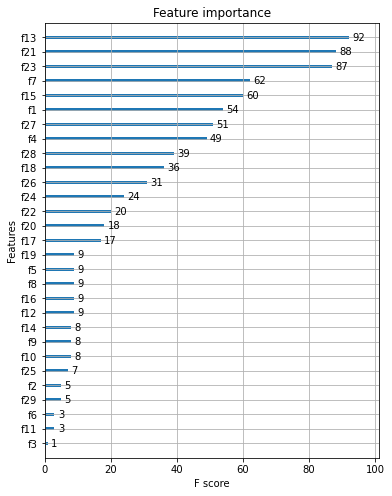

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 8))
plot_importance(xgb_clf, ax=ax)

아래와 같이 `num_trees = `를 지정해서 특정 나무 그림을 그려볼 수도 있는데 부스팅을 비롯한 앙상블 방법은 여러 모델을 결합하는 방법이다. 그러므로 위의 경우에는 400개에 이르는 나무 가운데 `개별 나무 그림을 그리는 것은 별다른 의미는 없다.` 분석에 도움되는 것은 아님

<AxesSubplot:>

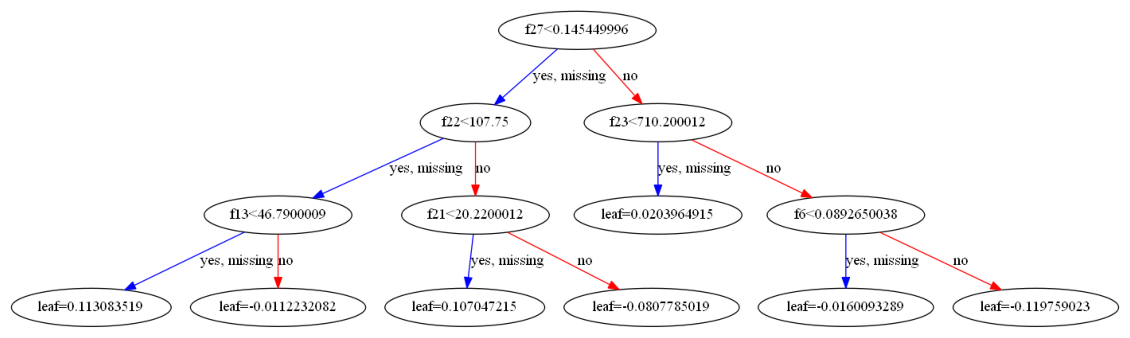

In [25]:
fig, ax = plt.subplots(figsize=(20, 18))
plot_tree(xgb_clf, ax=ax, num_trees = 10)

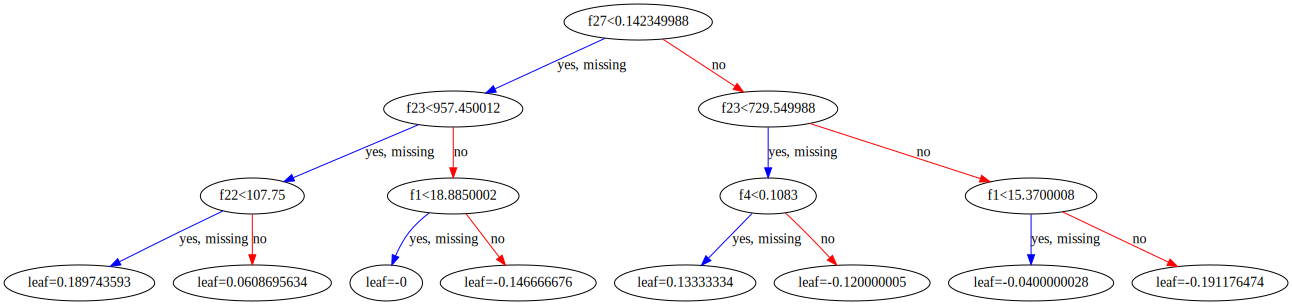

In [26]:
to_graphviz(xgb_clf, num_trees= 0)